In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from hypnn.neuralnetwork import Variable, Operation, NeuralNetwork
from hypnn.gui.mpldraw import MplHypergraph

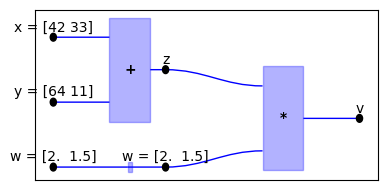

In [3]:
g = NeuralNetwork()
# Create scalar variables x, y, z, w, v
x = g.add_vertex(Variable((2,), value=np.array([42, 33]), name='x'))
y = g.add_vertex(Variable((2,), value=np.array([64, 11]), name='y'))
w = g.add_vertex(Variable((2,), value=np.array([2, 1.5]), name='w'))
z = g.add_vertex(Variable((2, ), name='z'))
v = g.add_vertex(Variable((2, ), name='v'))
# Create an addition operation x + y = z
g.add_edge(Operation(lambda arrays: [sum(arrays)], [x, y], [z], '+'))
# Create a multiplication operation z * w = v
g.add_edge(Operation(lambda arrays: [arrays[0] * arrays[1]], [z, w], [v], '*'))
g.inputs = [x, y, w]
g.outputs = [v]
g_mpl = MplHypergraph(g, annotate_vertices=True)
g_mpl.draw(figsize=(4, 2))

- NB the addition of identity operations is only for drawing, and does not occur during computation

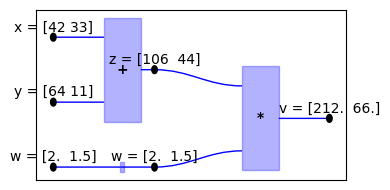

In [4]:
g.compute()
g_mpl = MplHypergraph(g, annotate_vertices=True)
g_mpl.draw(figsize=(4, 2))